# Week 1: Day 3 PM // Logistic Regression Pt.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,roc_auc_score
import time
import pandas as pd

%matplotlib inline

## Training from Scratch

Logistic regression can be said as the simplest predictive model for classification. Thus, it serve as a good tool for us to learn model optimization from scratch by code, without any toolbox.

In [ ]:

# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + np.exp(-yhat))

# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, lambda_,n_epoch):
  coef = [0.0 for i in range(len(train[0]))]
  losses = []
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      yhat = predict(row, coef)
      error =  yhat - row[-1]
      cost = -(row[-1]*np.log(yhat)+(1-row[-1])*np.log(1-yhat))
      #sum_error += error**2
      sum_error += cost

      #coef[0] = coef[0] + l_rate * (error * yhat * (1.0 - yhat) + lambda_ * coef[0]) SSE
      coef[0] = coef[0] - l_rate * (error + lambda_ * coef[0])
      for i in range(len(row)-1):
        #coef[i + 1] = coef[i + 1] + l_rate * (error * yhat * (1.0 - yhat) * row[i] + lambda_ * coef[i + 1])
        coef[i + 1] = coef[i + 1] - l_rate * (error * row[i] + lambda_ * coef[i + 1])
    losses.append(sum_error)
    if (epoch%25==0):
      print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
  return coef,losses


In [ ]:
# Calculate coefficients
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

>epoch=0, lrate=0.200, error=6.037
>epoch=25, lrate=0.200, error=3.357
>epoch=50, lrate=0.200, error=3.357
>epoch=75, lrate=0.200, error=3.357
>epoch=100, lrate=0.200, error=3.357
>epoch=125, lrate=0.200, error=3.357
>epoch=150, lrate=0.200, error=3.357
>epoch=175, lrate=0.200, error=3.357
[-0.23542513319755484, 1.1350742384445363, -0.5326157497416169]


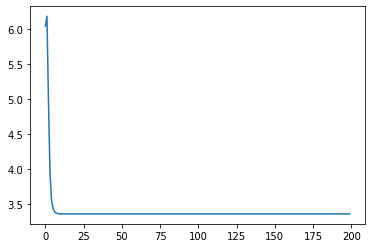

In [ ]:
l_rate = 0.2
n_epoch = 200
lambda_ = 0.2
coef,losses = coefficients_sgd(dataset, l_rate, lambda_,n_epoch)
print(coef)
plt.plot(losses)

Normalize Probability

In [ ]:
X = []
y=[]
for i in dataset:
  X.append(i[0:2])
  y.append(i[2])
X=np.array(X)
y=np.array(y)

In [ ]:
Z=[]
for i in np.c_[X[:,0], X[:,1]]:
  Z.append(predict(i,coef))

In [ ]:
Z_min = np.min(Z)
Z_max = np.max(Z)

In [ ]:
np.clip((Z-np.mean(Z))/(np.std(Z)),0,1)

array([0.0111957 , 0.        , 0.33929574, 0.        , 0.18837793,
       0.6784365 , 0.64241975, 0.67490473, 0.68044138, 0.6785838 ])

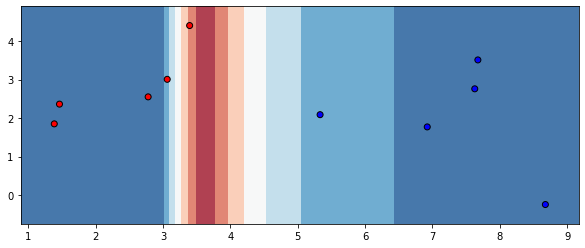

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
h = .02  # step size in the mesh
# just plot the dataset first
cm = plt.cm.RdBu 
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
#ax.scatter(X[:, 0], X[:,1], c=y, cmap=cm_bright,edgecolors='k')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = []
for i in np.c_[xx.ravel(), yy.ravel()]:
  Z.append(predict(i,coef))

Z = np.array(Z)
#Z = np.clip((Z-Z_min)/(Z_max-Z_min),0,1)
Z = np.clip((Z-np.mean(Z))/(np.std(Z)),0,1)
Z = Z.reshape(xx.shape)
Z = np.abs(0.5-(Z-Z.min())/(Z.max()-Z.min()))
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
              edgecolors='k')
plt.show()

In [ ]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 0.88807019, -0.74206865],
       [ 0.90807019, -0.74206865],
       [ 0.92807019, -0.74206865],
       ...,
       [ 9.12807019,  4.89793135],
       [ 9.14807019,  4.89793135],
       [ 9.16807019,  4.89793135]])

NameError: ignored

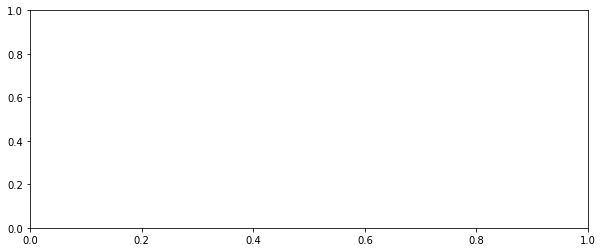

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(10,4))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

gnb = LogisticRegression()
model_gnb = gnb.fit(X, y)
Z = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
axs2[idx].contourf(xx, yy, Z, cmap=cm, alpha=.8)
axs2[idx].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
              edgecolors='k')
plt.show()

## Test on Toy Dataset

In [ ]:
mean1 = (2, 3);cov1 = [[1, 0], [0, 1]]
data_1 = np.random.multivariate_normal(mean1, cov1, (1000))

mean2 = (0, 0);cov2 = [[1, 0], [0, 1]]
data_2 = np.random.multivariate_normal(mean2, cov2, (1000))

X_1 = np.vstack([data_1,data_2])
y_1  = np.hstack([[1]*len(data_1),[2]*len(data_2)])
X_2,y_2=make_circles(n_samples=500,noise=0.2, factor=0.4, random_state=1)

datas = [[X_1,y_1],[X_2,y_2]]

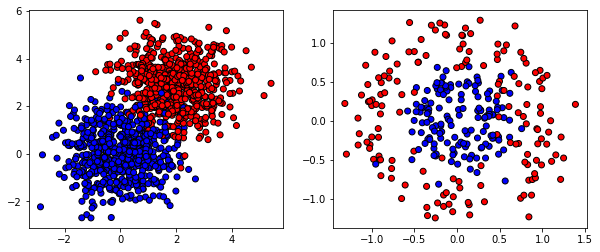

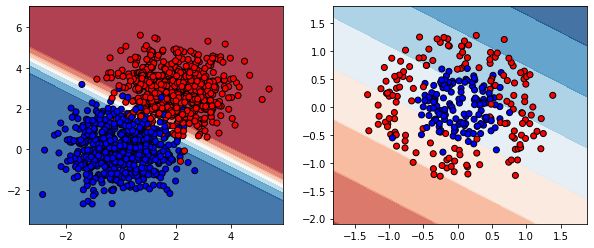

In [ ]:
from sklearn.linear_model import LogisticRegression

fig,axs = plt.subplots(1,2,figsize=(10,4))
fig,axs2 = plt.subplots(1,2,figsize=(10,4))
for idx,ax in enumerate(axs):
  X = datas[idx][0]
  y = datas[idx][1]
  h = .02  # step size in the mesh

  X_train, X_test, y_train, y_test = \
      train_test_split(X, y, test_size=.4, random_state=42)
  # just plot the dataset first
  cm = plt.cm.RdBu 
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
            edgecolors='k')
  

  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  gnb = LogisticRegression()
  model_gnb = gnb.fit(X, y)
  Z = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  Z = Z.reshape(xx.shape)
  axs2[idx].contourf(xx, yy, Z, cmap=cm, alpha=.8)
  axs2[idx].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
plt.show()

Logistic regression can only provide linear decision boudary, proving it is indeed a linear model.